## By - Parker Reedy, Aapthi Nagesh, Edison Pham, Celine Phan

---

### Data Description: World Happiness Report 2005-2022

Summary: This dataset is derived from the Gallup World Poll and serves as a foundation for evaluating global happiness and well-being over time, with an emphasis on these factors in guiding government policies. The report explores variations in happiness across countries using observed data on six key variables which are GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption. The happiness rankings are not determined on any index of the variables but the respondents own assessment of their lives.

Sampling: This data set includes Happiness reports from 2005 up until 2022 from various countries around the world. The data was collected annually through surveys and reports from numerous sources, where each country had 1000 respondents a year. Each row in the dataset corresponds to a specific country's and year's data. 


Variable Descriptions

* 'Country name' - Name of the country in which the data was collected.

* 'year' - The year in which the data was collected.

* 'Life Ladder' - The average measure of subjective well-being in a country. Each individual was asked to give a number 1 through 10 where 10 is the best possible life for them and 1 is the worst possible life for them.

* 'Log GDP per capita' - Statistics of Gross Domestic Product (GDP) per capita in purchasing power parity (PPP) at constant 2017 international dollar prices

* 'Social support' - National average of binary responses (0 or 1) indicating the presence or absence of relatives or friends to count on in times of trouble. A high value indicates strong social support within the country which means more individuals feel supported by family, friends, and others in their lives.

* 'Healthy life expectancy at birth' - The average life expectancy of a person with good health at birth.

* 'Freedom to make life choices' - Freedom to make life choices is the national average of responses to the question regarding satisfaction or dissatisfaction with the freedom to choose one's life path. A higher value indicates a higher level of individual freedom to make their life decisions.

* 'Generosity' - the residual of regressing national average of response to the question on donating money to charity in the past month on GDP per capita. A higher value indicates a higher willingness to help people besides one's self in a country.

* 'Perceptions of corruption' -  National average perception of corruption based on responses to two questions about government and business corruption. A higher value indicates that more individuals believe that corruption exists in government and businesses.

* 'Positive affect' -  National average of three positive affect measures (smiling/laughing, enjoyment, doing interesting things). Each individual score is an average of the 3 questions (binary responses) and the final score for each country is an average of all individuals' scores. A higher value indicates that individuals in the country experience more positive emotions.

* 'Negative affect' - National average of three negative affect measures (worry, sadness, anger). Each indicidual score is an average of the 3 questions (binary responses) and the final score for each country is an average of all individuals' scores. A higher value indicates that individuals in the country experience more negative emotions.




### Question of Interest: 

How does the wealth of a country relate to its overall happiness? In this analysis, we will study how well the log GDP per capita, which represents the country's wealth, predicts the reported happiness of its people. To further our analysis, we will look at the other predictors in this dataset that affect overall satisfaction, such as freedom to choose one's life path, as they might relate to the countries overall wealth. This will allow us to dive deeper and study the specific factors that make up a country's happiness and figure out which of them are more related to money. A satisfactory answer to this question will take each of these factors into account and explain them thoroughly.

------

### Data Cleaning:

First, we start by importing the libraries that we will need for analysis.

---

In [1]:
import altair as alt
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
alt.renderers.enable('mimetype')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # just to get rid of the future warnings

Then, we import the data to see what we have to work with.

In [2]:
data_raw = pd.read_csv('Data.csv')

In [3]:
#find columns with missing values
Missing_cols = data_raw.isna().mean()[data_raw.isna().mean()!= 0].index.to_list()

#print percentage of missing values
for name in Missing_cols:
   print(name + ' has ' + str(round(data_raw.isna().mean()[name], 4) * 100) + '% missing values.')

Log GDP per capita has 0.91% missing values.
Social support has 0.59% missing values.
Healthy life expectancy at birth has 2.46% missing values.
Freedom to make life choices has 1.5% missing values.
Generosity has 3.32% missing values.
Perceptions of corruption has 5.28% missing values.
Positive affect has 1.09% missing values.
Negative affect has 0.73% missing values.


Most of our variables of interest have missing values in some observations so for now, we will remove observations that are missing any of these variables  

In [4]:
#drop missing values from columns of interest
drop_columns = ['Log GDP per capita', 'Positive affect', 'Negative affect']
data = data_raw.copy().dropna(subset=drop_columns)

#make a new variable Net Positive
data['Net Positive'] = data['Positive affect'] - data['Negative affect']

#Create a new data set for the sake of visualization
data_show = data.copy()
rename_vals = {'year': 'Year', 'Healthy life expectancy at birth': 'Life Expectancy', 'Freedom to make life choices': 'Freedom Score', 'Perceptions of corruption': 'Corruption', 'Log GDP per capita': 'Log GDP'}

data_show = data_show.rename(columns = rename_vals)

#display
data_show.head(3)


Country name  Year  Life Ladder  Log GDP  Social support  Life Expectancy  \
0  Afghanistan  2008        3.724    7.350           0.451             50.5   
1  Afghanistan  2009        4.402    7.509           0.552             50.8   
2  Afghanistan  2010        4.758    7.614           0.539             51.1   

   Freedom Score  Generosity  Corruption  Positive affect  Negative affect  \
0          0.718       0.168       0.882            0.414            0.258   
1          0.679       0.191       0.850            0.481            0.237   
2          0.600       0.121       0.707            0.517            0.275   

   Net Positive  
0         0.156  
1         0.244  
2         0.242

Now that all of our variables of interest have no missing values, we created a new variable called 'Net Positive', which is 'Positive affect' minus 'Negative affect.' This variable indicates the Net Positive affect of a country. If it is a high value, that means on average individuals in the country are more happy and experience more positive emotions. This variable is important because it provides an aggregated value indicating the overall emotions for the specific country's people. 

Also, for the data set shown above, we shortened the names of some of the variables just for the sake of visualization. (The variables shortened are 'Log GDP per capita' -> Log GDP, 'Healthy Life Expectancy at birth' -> Life Expectancy, 'Freedom to make life choices' -> Freedom Score and 'Perceptions of Corruption' -> Corruption)

---

### Exploring the Data: 

In this part, we take a look at some figures and graphs that tell us more about the distributions of data and correlations between all variables. This is to mainly get familiar with the data.

---

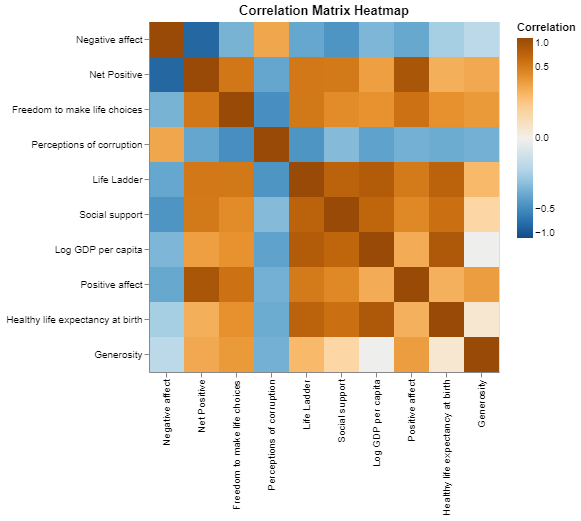

In [5]:
#make a correlation matrix of the data
corr_mx = data.set_index(['Country name', 'year']).corr()

#melt the matrix 
corr_mx_long = corr_mx.reset_index().rename(
    columns = {'index' : 'row'}
).melt(
    id_vars = 'row',
    var_name = 'col',
    value_name = 'Correlation'
)

#create a heatmap of the correlation matrix
fig1 = alt.Chart(corr_mx_long).mark_rect().encode(
    x = alt.X('col', title = '', sort = {'field': 'Correlation', 'order': 'ascending'}),
    y = alt.Y('row', title = '', sort = {'field': 'Correlation', 'order': 'ascending'}),
    color = alt.Color('Correlation', 
                      scale = alt.Scale(scheme = 'blueorange',
                                        domain = (-1, 1), 
                                        type = 'sqrt'),
                     legend = alt.Legend(tickCount = 5))
).properties(width = 350, height = 350, title='Correlation Matrix Heatmap')

#display
fig1

This heat map shows the correlation between all of the continuous variables in our dataset. The darker orange color shows a higher positive correlation between the two variables and a darker blue color shows a higher negative correlation. Right off the bat, we can see that "Life Ladder", or Happiness, has a positive correlation with all variables besides Negative affect and Perceptions of corruption, which have negative correlations. It shows that "Life Ladder" has the highest positive correlation with "Log GDP per capita" and "Healthy life expectancy at birth." We will take a closer look at some of these relationships throughout this project.

Next, we are going to look at the density of Life Ladder score just to get an idea of the distribution.

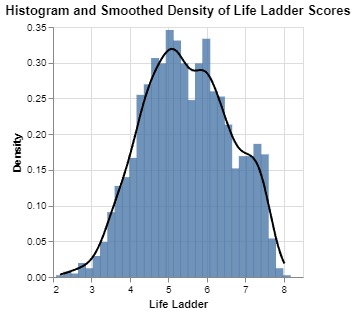

In [6]:
#create a histogram  of life ladder
hist = alt.Chart(data).transform_bin(  #setting the bin size and field
    as_ = ['bin_start', 'bin_end'],
    field = 'Life Ladder',
    bin = alt.Bin(step = 0.19)
).transform_aggregate( #type of statistic we are measuring count()
    Count= 'count()',
    groupby = ['bin_start', 'bin_end']
).transform_calculate(
    Density = 'datum.Count / (2146*0.19)',     # total number of observations * bin size
    binshift = '(datum.bin_start + datum.bin_end) / 2'
).mark_bar(size = 8, opacity = 0.8).encode(
    x = alt.X('binshift:Q', axis=alt.Axis(title = 'Life Ladder')),
    y = alt.Y('Density:Q', axis=alt.Axis(title='Density'))
).properties(
    title='Histogram and Smoothed Density of Life Ladder Scores',
    height = 250,
    width = 250
)


#Next create a kde for the histogram
smooth = alt.Chart(data).transform_density(
    density = 'Life Ladder', 
    as_ = ['Life Ladder', 'Estimated density'],
).mark_line(color = 'black').encode(
    x = 'Life Ladder:Q',
    y = 'Estimated density:Q'
)

#display
hist + smooth


Most of the Life Ladder score is centered around 5-6 which is slightly above average but there are countries with scores lower than 2. In the next part, we are going to analyze the data and see if there are patterns and deeper relationships that affect Life Ladder.

------

### Analyzing the Data:

In this part, we take a look more at the correlations between variables and reason as to why they might have specific interactions.

---

The first thing that we are going to do is look at the surface level relationships between "Life Ladder", "Net Positive", and "Log GDP per capita" because these are the main focuses of our question. To do this, we are going to simply plot the relationships in a scatterplot and add a regression line to them.

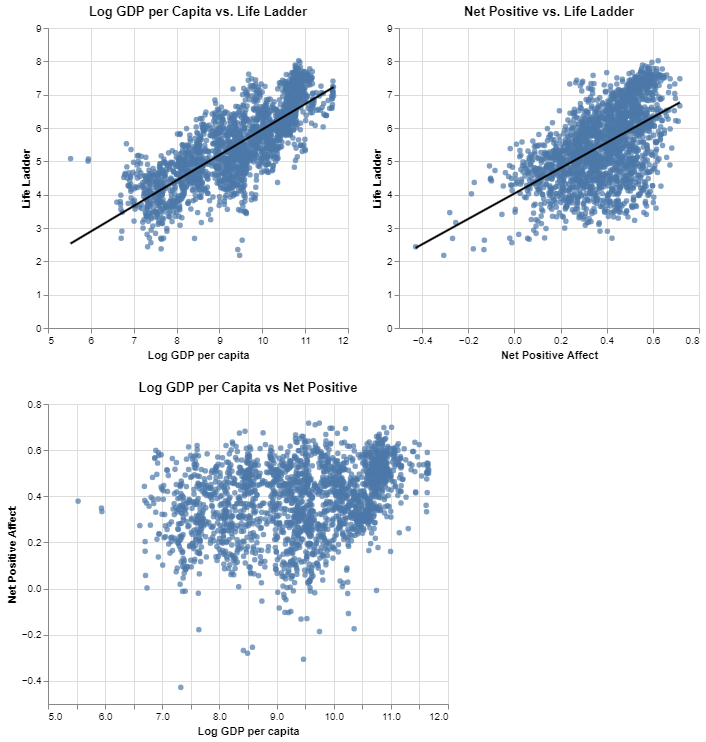

In [7]:
#create a plot of log gdp per capita vs life ladder
figLL = alt.Chart(data).mark_circle().encode(
    x = alt.X('Log GDP per capita:Q', scale = alt.Scale(domain = [5, 12])),
    y = alt.Y('Life Ladder:Q'),
).properties(
    title='Log GDP per Capita vs. Life Ladder'
)
#create a regression line for the plot
trend1 = figLL.transform_regression('Log GDP per capita', 'Life Ladder').mark_line(color = 'black')
#define the figure
fig2 = figLL + trend1

#create a plot of gdp vs net postive affect
figNP = alt.Chart(data).mark_circle().encode(
    y = alt.Y('Net Positive', title = 'Net Positive Affect'),
    x = alt.X('Log GDP per capita', scale = alt.Scale(domain = [5, 12]))
).properties(
    height = 300,
    width = 400,
    title = 'Log GDP per Capita vs Net Positive'
)
#define the figure
fig3 = figNP

#create a plot of net positive vs life ladder
figNPLL = alt.Chart(data).mark_circle().encode(
    x = alt.X('Net Positive:Q', title = 'Net Positive Affect'),
    y = alt.Y('Life Ladder:Q')
).properties(
    title = 'Net Positive vs. Life Ladder'
)

#create a regression line
trend2 = figNPLL.transform_regression('Net Positive', 'Life Ladder').mark_line(color = 'black')
#define the figure
fig4 = figNPLL + trend2

#display
(fig2 | fig4) & fig3

After plotting the 3 different graphs, we can visually see relationships between "Log GDP per capita" and "Life Ladder", as well as "Net Positive Affect" and "Life Ladder". When displaying the relationship between the "Log GDP per capita" and the "Net Positive Affect", there seems to be a positive correlation between the two variables. However, the data also varies greatly, so we must look further in to get a better sense of how money contributes to overall happiness. For now, since we know these two variables have a positive correlation with Life Ladder, we should check to see if any of the other variables can help show further relationships between these. 

The variable "Freedom to make life choices" is seemingly influential in determining individual happiness, as it reflects the ability to pursue personal preferences. However, it is crucial to acknowledge the potential influence of a country's GDP on this metric, given that wealthier regions often provide more opportunities for individuals to exercise their freedoms and pursue their interests.

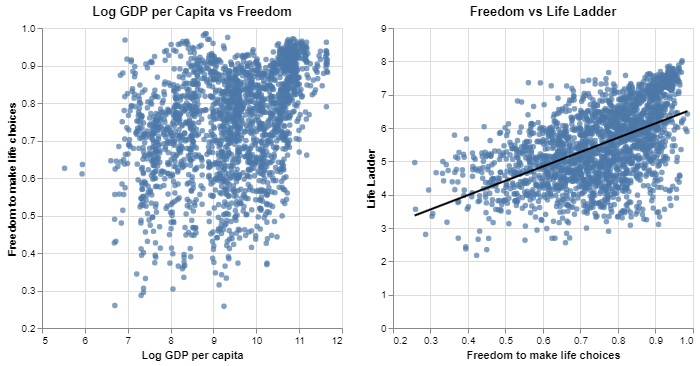

In [8]:
#create a plot of gdp vs freedom
fig5 = alt.Chart(data).mark_circle().encode(
    x = alt.X('Log GDP per capita:Q', scale = alt.Scale(domain=(5,12))), 
    y = alt.Y('Freedom to make life choices:Q', scale = alt.Scale(domain=(0.2,1)))
).properties(
    title = 'Log GDP per Capita vs Freedom'
)

#create plot for freedom vs life ladder
figFLL = alt.Chart(data).mark_circle().encode(
    x = alt.X('Freedom to make life choices:Q', scale = alt.Scale(domain = [0.2,1])),
    y = alt.Y('Life Ladder:Q')
).properties(
    title = 'Freedom vs Life Ladder'
)
#create a regression line
abline2 = figFLL.transform_regression('Freedom to make life choices', 'Life Ladder').mark_line(color = 'black')
#define figure
fig6 = figFLL + abline2

#display
fig5 | fig6

From above, Figure 5 looks seems to show very little relationship between GDP and Freedom to make life choices which is really interesting. Figure 6 on the other hand seems to show a positive relationship between Freedom and Life Ladder score. In the next step, we should take a deeper look at the GDP against Freedom to make life choices. In the next step, since Income is an important part of our analysis, we should put the Log GDP per capita into bins and sort by Low, Medium, and High Income Levels for each Country.

In [9]:
#Sorting Log GDP into Bins
data2 = data.copy()

data2 = data2.rename(columns = {'Log GDP per capita':'Log GDP'}) #renames column for data2
data2['bins'] = pd.qcut(data2['Log GDP'], q=3) #cuts the values in log GDP into 3 bins
data2['bins'] = data2['bins'].astype(str) # converts bins to a string

#create a dictionary that maps values of bins to new variable Income Level
income_values = {'(5.526, 8.965]': 'Low', '(8.965, 10.073]': 
        'Medium', '(10.073, 11.664]': 'High'}

#create new variable Income Level
data2['Income Level'] = data2['bins'].replace(income_values)

#categorize it
data2['Income Level'] = data2['Income Level'].astype(str)
data2['Income Level'] = data2['Income Level'].astype('category')
data2['Income Level'] = data2['Income Level'].cat.as_ordered().cat.reorder_categories(
    data2['Income Level'].cat.categories[[1,2,0]]
)
#create a sort order that we will use in future plots
sort_order = data2['Income Level'].cat.categories.tolist()

For the sake of visualization and interpretability, the next few plots will use the new variable "Income Level" which represents the Binned Log GDP per capita of a Country. All countries are classified as either 'Low', 'Medium', or 'High' if they have a Log GDP per capita of (5.526 to 8.965], (8.965, 10.073], or (10.073, 11.664] respectively. Now, lets take a look at the density curve of Freedom to make life choices grouped by Income Level.

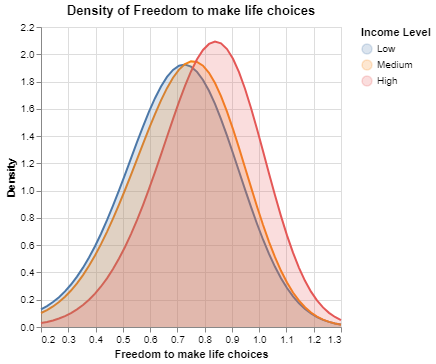

In [10]:
#  Density of Freedom grouped by income levels

base5 = alt.Chart(data2).transform_density(
    density = 'Freedom to make life choices',
    groupby = ['Income Level'], #groups by the variable income level
    as_ = ['Freedom to make life choices', 'Density'],
    bandwidth = 0.15,
    extent = [0.2,1.3],
    steps = 50
).mark_line().encode(
    x = 'Freedom to make life choices:Q',
    y = 'Density:Q',
    color = alt.Color('Income Level:N', sort=sort_order)
).properties(
    title = 'Density of Freedom to make life choices'
)
#define figure
fig7 = base5 + base5.mark_area(opacity = 0.2)

#display
fig7

As we can see from the plot above, Freedom to make life choices seems to be slightly affected by income level. The "High" income level has the highest mean Freedom score and is less variable than the lower income levels. But nonetheless, There doesn't seem to be a remarkable difference in the Income Levels. Lets take a closer look at the average Freedom scores over time to see if there is a consistent difference.

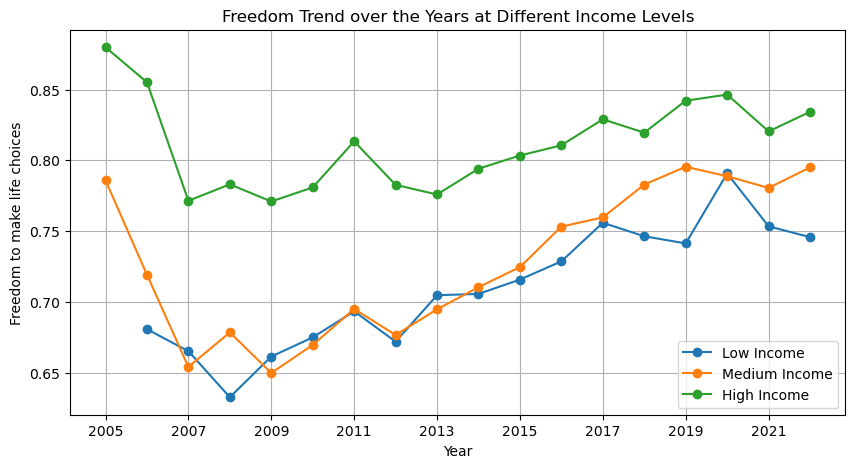

In [11]:
#Taking aggregate data for freedom
agg_data2 = data2.groupby(['year', 'Income Level'])['Freedom to make life choices'].mean().reset_index()

#Separating data based on income levels
low = (agg_data2[agg_data2['Income Level'] == 'Low'])
med = (agg_data2[agg_data2['Income Level'] == 'Medium'])
high = (agg_data2[agg_data2['Income Level'] == 'High'])

#Creating line plot
plt.figure(figsize = (10, 5)) #Setting size of plot

plt.plot(low['year'], low['Freedom to make life choices'], label = 'Low Income', marker = 'o')
plt.plot(med['year'], med['Freedom to make life choices'], label = 'Medium Income', marker = 'o')
plt.plot(high['year'], high['Freedom to make life choices'], label = 'High Income', marker = 'o')

#Labels
plt.xlabel('Year')
plt.ylabel('Freedom to make life choices')
plt.title('Freedom Trend over the Years at Different Income Levels')
plt.legend()

#Setting custom ticks
ticks = range(agg_data2['year'].min(), agg_data2['year'].max() + 1, 2)
plt.xticks(ticks)

#Displaying the plot
plt.grid(True)
plt.show()

From this graph, we can see that countries with high income have a higher freedom to make life choices, and countries with medium income are roughly the same as low income, with it being higher in only the last few years. For all incomes, their freedom to make life choices dropped in 2007, due to the 2007-2008 financial crisis. Over time, countries at all income levels had an overall rise in the freedom to make life choices, but it is clear to see that with the high income level, citizens consistently felt that they had more freedom to make their own life decisions. 

Now we can check how GDP relates to the countries with the highest and lowest 'freedom to make life choices' scores.

In [12]:
#create a dataset sorted by descending freedom score
freedom_descending = data.drop(columns= ['year']).groupby(
    ['Country name'], as_index = False).mean().sort_values(by= 'Freedom to make life choices', ascending = False)

#create a dataset sorted by ascending freedom score
freedom_ascending = data.drop(columns= ['year']).groupby(
    ['Country name'], as_index = False).mean().sort_values(by= 'Freedom to make life choices')

#define highest freedom score countries and display
top_five_freedom = freedom_descending.head(5)[['Country name', 'Freedom to make life choices', 'Log GDP per capita']]
top_five_freedom

Country name  Freedom to make life choices  Log GDP per capita
109       Norway                      0.951583           11.063583
23      Cambodia                      0.948000            8.160533
38       Denmark                      0.943471           10.890588
47       Finland                      0.942533           10.758267
154   Uzbekistan                      0.933571            8.698500

These scores show that the countries with the most satisfaction with the freedom to choose their life choices are Norway, Cambodia, Denmark, Finland, and Uzbekistan. They all have a relatively high log GDP per capita as well.

In [13]:
#define lowest freedom score countries and display
low_five_freedom = freedom_ascending.head(5)[['Country name', 'Freedom to make life choices', 'Log GDP per capita']]
low_five_freedom

Country name  Freedom to make life choices  Log GDP per capita
22      Burundi                      0.450800            6.682200
3        Angola                      0.456250            8.985750
58        Haiti                      0.461636            8.029818
0   Afghanistan                      0.508615            7.585615
27         Chad                      0.511467            7.410200

In contrast, the countries with the least satisfaction with their freedom to choose their life choices are Burundi, Angola, Haiti, Afghanistan, and Chad. The log GDP per capita for these countries are on the lower end which validates our findings. Now lets take a step back from the Freedom variable to look at other variables that might be influenced by Income Level and that correlate to Life Ladder.

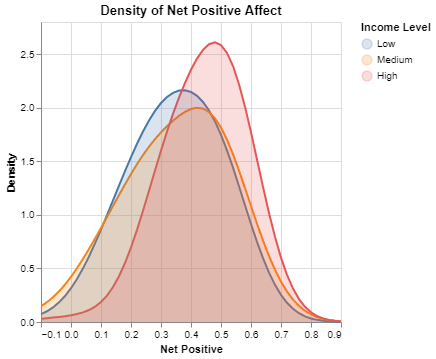

In [14]:
# Density graph of Net Positive Affect

base3 = alt.Chart(data2).transform_density(
    density = 'Net Positive',
    groupby = ['Income Level'],
    as_ = ['Net Positive', 'Density'],
    bandwidth = 0.09,
    extent = [-0.1,0.9],
    steps = 50
).mark_line().encode(
    x = 'Net Positive:Q',
    y = 'Density:Q',
    color = alt.Color('Income Level:N', sort=sort_order)
).properties(
    title = 'Density of Net Positive Affect'
)
#define figure
fig8 = base3 + base3.mark_area(opacity = 0.2)

#display
fig8

Figure 8 above does show more of a relationship between the Net Positive Affect and Income Level. Similar to the Freedom variable, the "High" Income Level again has the highest mean Net Positive values and is less variable than the other Levels. It seems that the combination of multiple variables are the reason that Log GDP is so correlated with the Life Ladder Score. Lets take a look at some more variables to see if this pattern persists.

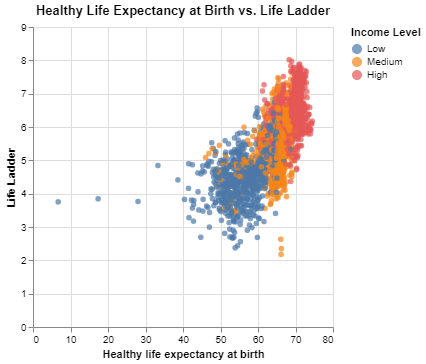

In [15]:
# life expectation vs life ladder grouped by income levels

fig9 = alt.Chart(data2[data2['Healthy life expectancy at birth'].notna()]).mark_circle().encode(
    x = alt.X('Healthy life expectancy at birth:Q'),
    y = alt.Y('Life Ladder:Q'),
    color = alt.Color('Income Level:N', sort = sort_order)
).properties(
    title = 'Healthy Life Expectancy at Birth vs. Life Ladder'
)

#display
fig9

Figure 9 shows a very positive correlation between Income level, Healthy Life expectancy at birth, and Life Ladder Score. The Higher Income Levels consistently have a higher Healthy Life expectancy at birth and the higher life expectancy on average indicates a higher Life Ladder score. For one final test, we should check to see if Social Support has any relationship between Life Ladder and Income level.

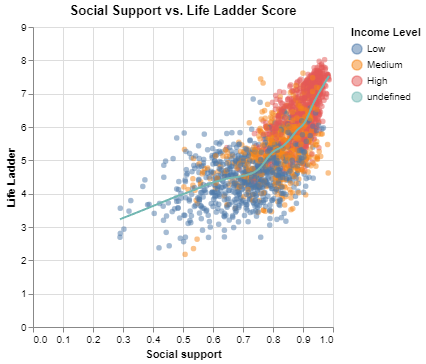

In [16]:
#create scatter plot of social support vs life ladder grouped by income level
scatter4 = alt.Chart(data2[data2['Social support'].notna()]).mark_circle(opacity = 0.5).encode(
    x = alt.X('Social support:Q'),
    y = alt.Y('Life Ladder:Q', title = 'Life Ladder'),
    color = alt.Color('Income Level:N', sort=sort_order)
).properties(
    title = 'Social Support vs. Life Ladder Score'
)

#create smoothing spline 
smooth4 = scatter4.transform_loess(
    on = 'Social support',
    loess = 'Life Ladder',
    bandwidth = 0.2
).mark_line()

#layer and display
scatter4 + smooth4


This scatterplot shows a very strong relationship between social support and Life Ladder score. Overall, these past couple plots show a complex relationship between GDP and Life Ladder. Many of these variables are related to the GDP of a country and also to Life Ladder which shows that the reason for GDP affecting Life Ladder is likely due to these multifaceted relationships.

------

### Conclusion:

In conclusion, our analysis of the World Happiness Report spanning from 2005 to 2022 has provided valuable insights into the complex relationship between a country's wealth and the overall happiness of its citizens. Our exploration of the dataset sought to answer this question.

The correlation heatmap revealed that life satisfaction, represented by the "Life Ladder" variable is positively associated with various factors, most notably "Log GDP per capita." As we delved deeper into visualizations and analysis, we noticed a trend that variables such as "Net Positive Affect", "Freedom to make life choices", "Social Support", and "Healthy life expectancy at birth" all consistently had positive correlations with the Life Ladder scoe as well as the Log GDP per capita of a Country. As the country's wealth increased, these variables also on average increased which are all shown to have a positive affect on the happiness of the Country. An important thing to note about the data is that these observations are the combined averages of life ladder scores for an entire country, so it is unpractical to make assumptions or conclusions about individuals in any given country. In summary, while GDP per capita is positively correlated with life satisfaction, our analysis emphasizes the much more complex nature of this relationship. A comprehensive understanding of the dynamic between these variables is crucial to answering the question that we sought to answer.